<center><h1 style="text-decoration: underline;">A Customer Churn Prediction</h1></center>

### Project Scenario
Every company wants to increase its profit or revenue margin and customer retention is one key area industry players focus their resources. In today's world of machine learning, most companies build classification models to perform churn analysis on their customers. 

Classification in machine learning and statistics entails a supervised learning approach where the computer program learns from provided data to make new observations or classifications. The primary objective is to determine the class or category into which new data points will fall. In this project scenario, an elaborate analysis will be conducted to train at least four models for predicting customer churn in a telecom company. This analysis will adhere to the **CRISP-DM framework**, ensuring a structured and systematic approach to model development and evaluation.

##### <h1 style="text-decoration: underline;">Hypothesis Testing</h1>
### Hypothesis1
***Null Hypothesis(Ho)***: Customers with longer tenure (number of months stayed with the company) are more likely to churn compared to new customers.

***Alternative Hypothesis(Ha)***:  Customers with longer tenure (number of months stayed with the company) are less likely to churn compared to new customers.


### Hypothesis2
***Null Hypothesis(Ho)***: Customers with higher monthly charges (MonthlyCharges) are more likely to churn due to cost considerations.

***Alternative Hypothesis(Ha)***: Customers with higher monthly charges (MonthlyCharges) are less likely to churn due to cost considerations.

##### <h1 style="text-decoration: underline;">Business Questions</h1>

1. What is the average tenure of customers who churned compared to those who stayed?
2. Do customers with partners or dependents have a lower churn rate?
3. How does the presence of multiple lines affect customer churn?
4. Is there a correlation between the contract term (Contract) and customer churn?
5. What are the common payment methods (Payment Method) among customers who churned?
6. How does the availability of tech-related services (e.g., OnlineSecurity, TechSupport) impact churn rates?
7. What percentage of customers who churned had streaming services (StreamingTV, StreamingMovies)?
8. Is there a difference in churn rates between senior citizens and non-senior citizens?


## ***Import necessary libraries***

In [341]:
from dotenv import dotenv_values 
import pyodbc 
import numpy as np
import pandas as pd                          
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu
from scipy.stats import fisher_exact
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import plotly.express as px
from scipy.stats import chi2_contingency
from scipy.stats import stats

# Machine Learning Packages:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')

print("🛬 Imported all packages.", "Warnings hidden. 👻")

🛬 Imported all packages. Warnings hidden. 👻


#### <center><h1 style="text-decoration: underline;">**LOAD DATA**</h1></center>



##### *The first_3000-dataset is from a database management system, that is MIRCORSOFT SQL SERVER. Connection was made to the database using an Open Database Connectivity standard library, pyodbc. For dataset 2&3, the files were just read from the directory <br>*



In [342]:
# Load environment variables from .env file into a dictionary
environment_variables = dotenv_values('.env')


# Get the values for the credentials you set in the '.env' file
server = environment_variables.get("SERVER")
database = environment_variables.get("DATABASE")
username = environment_variables.get("USERNAME")
password = environment_variables.get("PASSWORD")




In [343]:
# # Create a connection string
# connection_string = f"Driver={{SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password}"
# connection = pyodbc.connect(connection_string)
# query = "SELECT * FROM LP2_Telco_churn_first_3000"

# data1 = pd.read_sql(query, connection)
# data1.head()

# #Close the connection
# #connection.close()

In [344]:
#Save file to csv
# data1.to_csv(r'C:\Users\User\Desktop\Curium2\LP2-Curium-\Data\LP2_Telco_churn_first_3000.csv', index=False)


In [345]:
data1= pd.read_csv(r"Data/LP2_Telco_churn_first_3000.csv")

In [346]:


data1.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,False,True,False,1,False,NaN,DSL,False,...,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.850000,False
1,5575-GNVDE,Male,False,False,False,34,True,False,DSL,True,...,True,False,False,False,One year,False,Mailed check,56.950001,1889.500000,False
2,3668-QPYBK,Male,False,False,False,2,True,False,DSL,True,...,False,False,False,False,Month-to-month,True,Mailed check,53.849998,108.150002,True


In [347]:
data2 = pd.read_csv("Data\LP2_Telco-churn-second-2000.csv")
data2.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5600-PDUJF,Male,0,No,No,6,Yes,No,DSL,No,...,No,Yes,No,No,Month-to-month,Yes,Credit card (automatic),49.50,312.7,No
1,8292-TYSPY,Male,0,No,No,19,Yes,No,DSL,No,...,Yes,Yes,No,No,Month-to-month,Yes,Credit card (automatic),55.00,1046.5,Yes
2,0567-XRHCU,Female,0,Yes,Yes,69,No,No phone service,DSL,Yes,...,Yes,No,No,Yes,Two year,Yes,Credit card (automatic),43.95,2960.1,No
3,1867-BDVFH,Male,0,Yes,Yes,11,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,74.35,834.2,Yes
4,2067-QYTCF,Female,0,Yes,No,64,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,111.15,6953.4,No


In [348]:
test_data = pd.read_excel("Data/Telco-churn-last-2000.xlsx")
test_data.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7613-LLQFO,Male,0,No,No,12,Yes,Yes,Fiber optic,No,No,No,No,Yes,No,Month-to-month,Yes,Electronic check,84.45,1059.55
1,4568-TTZRT,Male,0,No,No,9,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.40,181.8
2,9513-DXHDA,Male,0,No,No,27,Yes,No,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,No,Electronic check,81.70,2212.55
3,2640-PMGFL,Male,0,No,Yes,27,Yes,Yes,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,79.50,2180.55
4,3801-HMYNL,Male,0,Yes,Yes,1,Yes,No,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,No,Mailed check,89.15,89.15


#### <center><h1 style="text-decoration: underline;">**EXLORATORY DATA ANALYSIS(*EDA*)**</h1></center>


### **CLEANING DATA**

#### 1. Clean the validation data (Data1 & Data2)
- Concatenate  all the columns of Data1 and Data2 into one dataframe called "valid_data" by stacking them vertically.
- Standardize the column entries.
- Drop duplcates if any.
- Drop unneeded columns-customerID
- Fill nulls


In [349]:
#Concat the validation data
valid_data = pd.concat([data1, data2], ignore_index=True)
valid_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,True,False,1,False,NaN,DSL,False,...,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.85,False
1,5575-GNVDE,Male,0,False,False,34,True,False,DSL,True,...,True,False,False,False,One year,False,Mailed check,56.950001,1889.5,False
2,3668-QPYBK,Male,0,False,False,2,True,False,DSL,True,...,False,False,False,False,Month-to-month,True,Mailed check,53.849998,108.150002,True
3,7795-CFOCW,Male,0,False,False,45,False,NaN,DSL,True,...,True,True,False,False,One year,False,Bank transfer (automatic),42.299999,1840.75,False
4,9237-HQITU,Female,0,False,False,2,True,False,Fiber optic,False,...,False,False,False,False,Month-to-month,True,Electronic check,70.699997,151.649994,True


In [350]:
valid_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5043 non-null   object 
 1   gender            5043 non-null   object 
 2   SeniorCitizen     5043 non-null   int64  
 3   Partner           5043 non-null   object 
 4   Dependents        5043 non-null   object 
 5   tenure            5043 non-null   int64  
 6   PhoneService      5043 non-null   object 
 7   MultipleLines     4774 non-null   object 
 8   InternetService   5043 non-null   object 
 9   OnlineSecurity    4392 non-null   object 
 10  OnlineBackup      4392 non-null   object 
 11  DeviceProtection  4392 non-null   object 
 12  TechSupport       4392 non-null   object 
 13  StreamingTV       4392 non-null   object 
 14  StreamingMovies   4392 non-null   object 
 15  Contract          5043 non-null   object 
 16  PaperlessBilling  5043 non-null   object 


In [351]:
valid_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5043 non-null   object 
 1   gender            5043 non-null   object 
 2   SeniorCitizen     5043 non-null   int64  
 3   Partner           5043 non-null   object 
 4   Dependents        5043 non-null   object 
 5   tenure            5043 non-null   int64  
 6   PhoneService      5043 non-null   object 
 7   MultipleLines     4774 non-null   object 
 8   InternetService   5043 non-null   object 
 9   OnlineSecurity    4392 non-null   object 
 10  OnlineBackup      4392 non-null   object 
 11  DeviceProtection  4392 non-null   object 
 12  TechSupport       4392 non-null   object 
 13  StreamingTV       4392 non-null   object 
 14  StreamingMovies   4392 non-null   object 
 15  Contract          5043 non-null   object 
 16  PaperlessBilling  5043 non-null   object 


#### Drop CustomerID column from the dataset

In [352]:
valid_data.drop('customerID', axis=1,inplace =True)

In [353]:
#Check for uniques
cols= ['gender', 'SeniorCitizen', 'Partner', 'Dependents','tenure', 'PhoneService', 'MultipleLines', 
        'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport','StreamingTV', 
        'StreamingMovies', 'Contract', 'PaperlessBilling','PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']


results = []

for i in cols:
    
    unique_values = valid_data[i].unique()
    num_unique_values = valid_data[i].nunique()
    
    
    results.append([i, unique_values, num_unique_values])


results_df = pd.DataFrame(results, columns=['Column', 'Unique_Values', 'Num_Unique_Values'])


results_df

,Column,Unique_Values,Num_Unique_Values
0,gender,"[Female, Male]",2
1,SeniorCitizen,"[0, 1]",2
2,Partner,"[True, False, No, Yes]",4
3,Dependents,"[False, True, No, Yes]",4
4,tenure,"[1, 34, 2, 45, 8, 22, 10, 28, 62, 13, 16, 58, ...",73
5,PhoneService,"[False, True, Yes, No]",4
6,MultipleLines,"[nan, False, True, No, No phone service, Yes]",5
7,InternetService,"[DSL, Fiber optic, No]",3
8,OnlineSecurity,"[False, True, nan, No, Yes, No internet service]",5
9,OnlineBackup,"[True, False, nan, No, Yes, No internet service]",5


Standardize categorical columns.
 - True : Yes
 - False : No
 - None : NaN

In [354]:
#Entry standardization of categorical columns
cols = [ 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'Churn']

for col in cols:
    if valid_data[col].eq('No phone service').any():
        valid_data['MultipleLines'].replace({'No phone service': 'No'}, inplace=True)

    if valid_data[col].eq('No internet service').any():
        cols_to_replace = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection','TechSupport','StreamingTV','StreamingMovies']
        valid_data[cols_to_replace] = valid_data[cols_to_replace].replace({'No internet service': 'No'}, inplace=False)

    if valid_data[col].dtype == 'object' or valid_data[col].dtype == 'category':
        valid_data[col] = valid_data[col].replace({'True': 'Yes', 'False': 'No', True : 'Yes', False : 'No', 'None': np.nan})

In [355]:
#Check for uniques
cols= [ 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'Churn']


results = []

for i in cols:
    
    unique_values = valid_data[i].unique()
    num_unique_values = valid_data[i].nunique()
    
    
    results.append([i, unique_values, num_unique_values])


results_df = pd.DataFrame(results, columns=['Column', 'Unique_Values', 'Num_Unique_Values'])


results_df

,Column,Unique_Values,Num_Unique_Values
0,gender,"[Female, Male]",2
1,SeniorCitizen,"[0, 1]",2
2,Partner,"[Yes, No]",2
3,Dependents,"[No, Yes]",2
4,tenure,"[1, 34, 2, 45, 8, 22, 10, 28, 62, 13, 16, 58, ...",73
5,PhoneService,"[No, Yes]",2
6,MultipleLines,"[nan, No, Yes]",2
7,InternetService,"[DSL, Fiber optic, No]",3
8,OnlineSecurity,"[No, Yes, nan]",2
9,OnlineBackup,"[Yes, No, nan]",2


In [356]:
valid_data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,NaN,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.850000,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.950001,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.849998,108.150002,Yes
3,Male,0,No,No,45,No,NaN,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.299999,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.699997,151.649994,Yes


In [357]:
valid_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            5043 non-null   object 
 1   SeniorCitizen     5043 non-null   int64  
 2   Partner           5043 non-null   object 
 3   Dependents        5043 non-null   object 
 4   tenure            5043 non-null   int64  
 5   PhoneService      5043 non-null   object 
 6   MultipleLines     4774 non-null   object 
 7   InternetService   5043 non-null   object 
 8   OnlineSecurity    4392 non-null   object 
 9   OnlineBackup      4392 non-null   object 
 10  DeviceProtection  4392 non-null   object 
 11  TechSupport       4392 non-null   object 
 12  StreamingTV       4392 non-null   object 
 13  StreamingMovies   4392 non-null   object 
 14  Contract          5043 non-null   object 
 15  PaperlessBilling  5043 non-null   object 
 16  PaymentMethod     5043 non-null   object 


In [358]:
#Check for duplicates
# duplicates = valid_data.duplicated(keep=False)
# duplicates = valid_data[duplicates]

# print(duplicates)


In [359]:
print(valid_data.isna().sum())

gender                0
SeniorCitizen         0
Partner               0
Dependents            0
tenure                0
PhoneService          0
MultipleLines       269
InternetService       0
OnlineSecurity      651
OnlineBackup        651
DeviceProtection    651
TechSupport         651
StreamingTV         651
StreamingMovies     651
Contract              0
PaperlessBilling      0
PaymentMethod         0
MonthlyCharges        0
TotalCharges          5
Churn                 1
dtype: int64


In [360]:
# convert the numeric columns to float
numeric_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

valid_data[numeric_cols] = valid_data[numeric_cols].apply(pd.to_numeric, errors='coerce')

display(valid_data.dtypes)

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

Fill nulls.
 - Churn nulls with the mode
 - In total charges, fill the nulls with the respective entry in the monthly charges column
 - The rest with no

In [361]:
# # Filling all missing values with 'no'
cols_to_use = ['MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
for values in cols_to_use:
    if valid_data[values].isna().any() == True:
        valid_data[values] = valid_data[values].fillna('No')
        

In [362]:
#Creating a mask variable for the missing values in the column for totalcharges
mask = valid_data['TotalCharges'].isna()

# Filling the missing values of totalcharge with the values of the monthlycharge
valid_data['TotalCharges'].fillna(valid_data.loc[mask,'MonthlyCharges'], inplace = True)



In [363]:
# Filling the missing value in the churn column with mode
mode_churn = valid_data['Churn'].mode()[0]
valid_data['Churn'] = valid_data['Churn'].fillna(mode_churn)


In [364]:
valid_data.to_csv(r'C:\Users\User\Desktop\Curium2\LP2-Curium-\Data\Dashboard.csv', index=False)


In [365]:
numerical_columns = valid_data.select_dtypes('number').columns
numerical_columns

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')

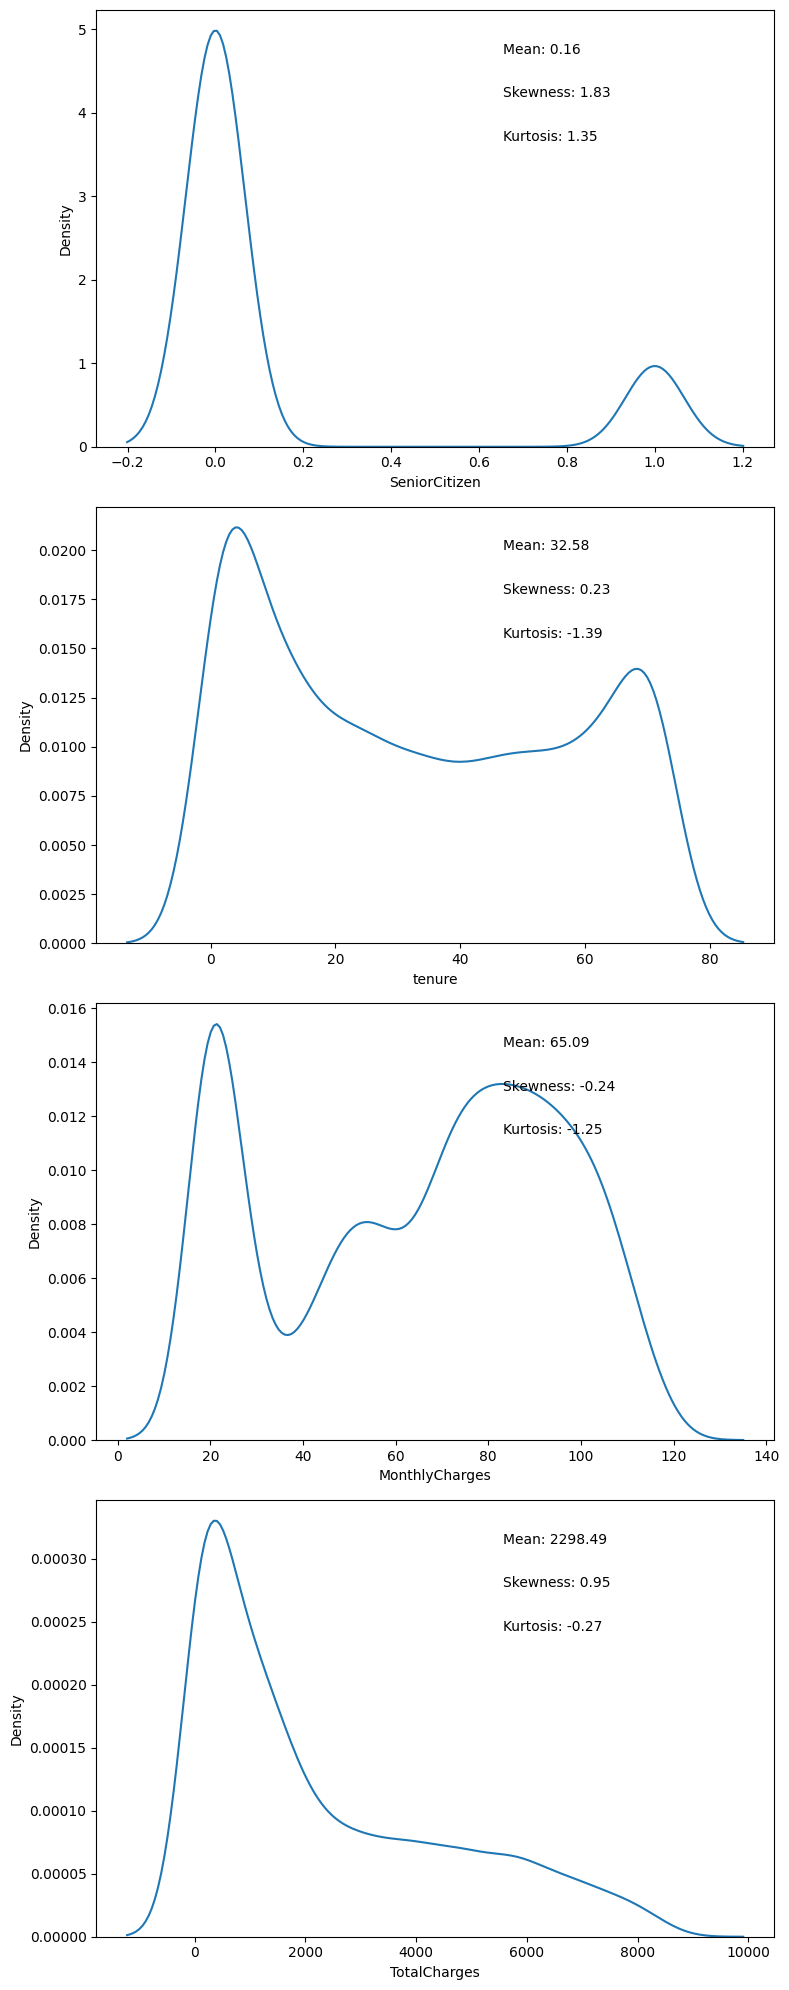

In [366]:
# Plot KDEs(kernel density estimation) for all columns
fig, axes = plt.subplots(nrows=len(numerical_columns), figsize=(8, 20))
for i, col in enumerate(numerical_columns):
    sns.kdeplot(data= valid_data, x=col, ax=axes[i])
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Density')
   
    # Calculate mean, skewness, and kurtosis
    mean_val = valid_data[col].mean()
    skewness_val = valid_data[col].skew()
    kurtosis_val = valid_data[col].kurtosis()
   
    # Add mean, skewness, and kurtosis as text annotations
    axes[i].text(0.6, 0.9, f'Mean: {mean_val:.2f}', transform=axes[i].transAxes)
    axes[i].text(0.6, 0.8, f'Skewness: {skewness_val:.2f}', transform=axes[i].transAxes)
    axes[i].text(0.6, 0.7, f'Kurtosis: {kurtosis_val:.2f}', transform=axes[i].transAxes)
   
plt.tight_layout()
plt.show()

### **TESTING DATASET**
1. Univariate analysis
   - Tenure
   - Monthly charges
   - Churn
2. Bivariate analysis
   - Monthly charges by churn
   - Gender by churn
4. Multivariate analysis
   - Tenure vs. MonthlyCharges vs churn
   - Correlation matrix

 <h1 style="text-decoration: underline;">1. Univariate Analysis</h1>

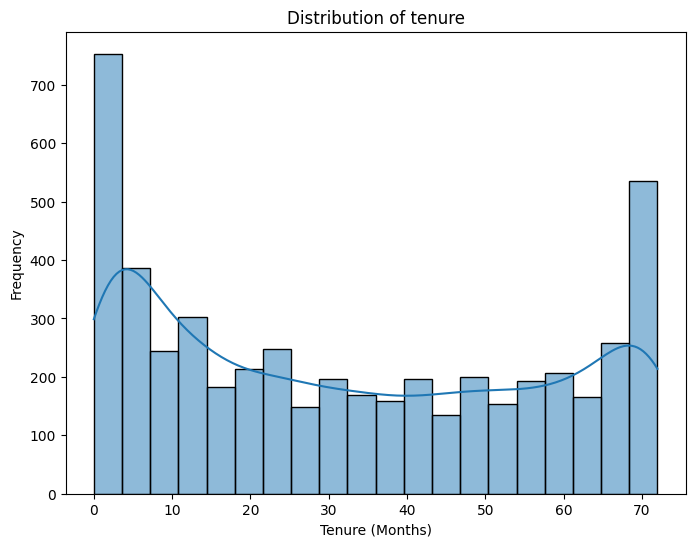

Summary statistics for Tenure:
count    5043.000000
mean       32.576641
std        24.529807
min         0.000000
25%         9.000000
50%        29.000000
75%        56.000000
max        72.000000
Name: tenure, dtype: float64


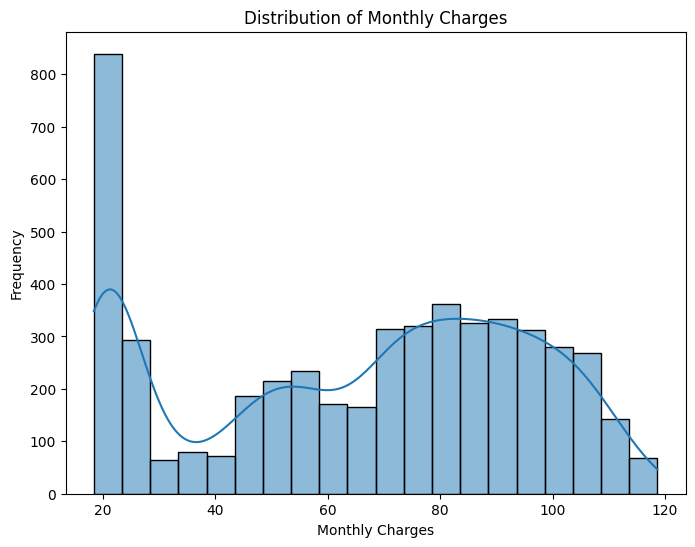


Summary statistics for Monthly Charges:
count    5043.000000
mean       65.090214
std        30.068133
min        18.400000
25%        35.775000
50%        70.550003
75%        90.050003
max       118.650002
Name: MonthlyCharges, dtype: float64


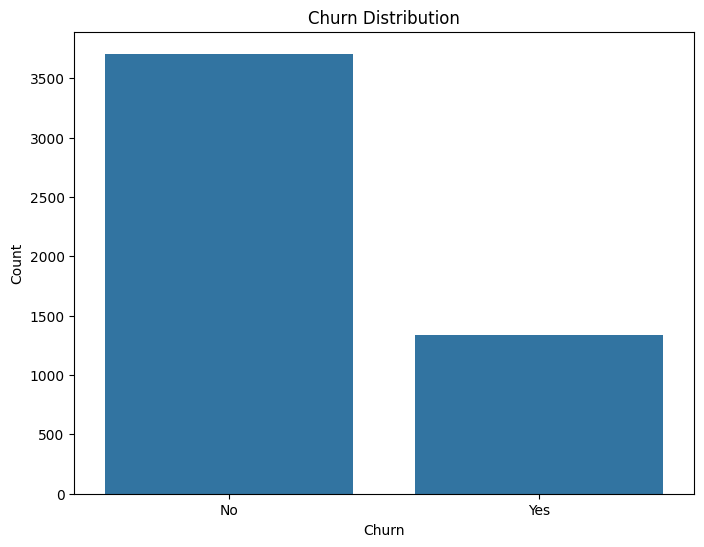


Churn distribution:
Churn
No     3707
Yes    1336
Name: count, dtype: int64


In [367]:
# Tenure
plt.figure(figsize=(8, 6))
sns.histplot(valid_data['tenure'], bins=20, kde=True)
plt.title('Distribution of tenure')
plt.xlabel('Tenure (Months)')
plt.ylabel('Frequency')
plt.show()

print("Summary statistics for Tenure:")
print(valid_data['tenure'].describe())

# Monthly Charges
plt.figure(figsize=(8, 6))
sns.histplot(valid_data['MonthlyCharges'], bins=20, kde=True)
plt.title('Distribution of Monthly Charges')
plt.xlabel('Monthly Charges')
plt.ylabel('Frequency')
plt.show()

print("\nSummary statistics for Monthly Charges:")
print(valid_data['MonthlyCharges'].describe())

# Churn
plt.figure(figsize=(8, 6))
sns.countplot(data=valid_data, x='Churn')
plt.title('Churn Distribution')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()

print("\nChurn distribution:")
print(valid_data['Churn'].value_counts())

**Insights**

Based on the univariate analysis of the data, here are the insights:

*Tenure Distribution:*
- The average tenure of customers is approximately 32.6 months, with a considerable standard deviation of 24.5 months. This indicates a wide range of tenure lengths among customers.
- Customers tend to stay with the service for a median tenure of 29 months, suggesting a relatively stable customer base.
- The distribution is positively skewed, as the mean is greater than the median, implying a longer tail towards higher tenure values.
- The shortest tenure observed is 0 months, possibly indicating new customers or data anomalies, while the longest tenure is 72 months, suggesting long-term loyalty among some customers.

*Monthly Charges Distribution:*
- The average monthly charge for customers is $65.09, with a standard deviation of $30.07. This indicates significant variability in the monthly charges among customers.
- The median monthly charge is $70.55, indicating that half of the customers pay more than this amount and half pay less.
Monthly charges range from $18.40 to $118.65, reflecting diverse pricing plans or service offerings.
- The distribution appears slightly negatively skewed, with the mean slightly lower than the median, suggesting a longer tail towards lower monthly charges.

*Churn Distribution:*
- Among the observed customers, 3707 have not churned (73.5%), while 1336 have churned (26.5%).
- This indicates a churn rate of approximately 26.5%, which is significant and may warrant further investigation into factors influencing churn.

<h1 style="text-decoration: underline;">2. Bivariate Analysis</h1>

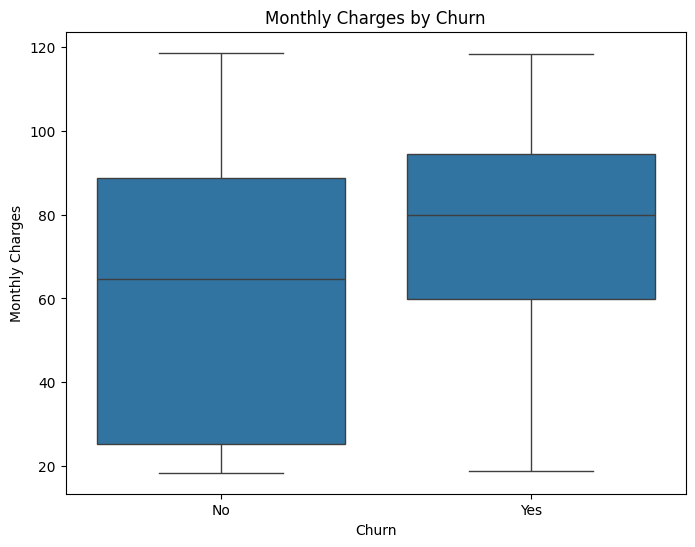

In [368]:
# Box plot of MonthlyCharges across Churn categories
plt.figure(figsize=(8, 6))
sns.boxplot(data=valid_data, x='Churn', y='MonthlyCharges')
plt.title('Monthly Charges by Churn')
plt.xlabel('Churn')
plt.ylabel('Monthly Charges')
plt.show()

**Insights**

The graph shows a negative correlation between monthly charges and churn. This means that customers with higher monthly charges tend to churn less often than customers with lower monthly charges.

There could be a couple of explanations for the same as listed below:
- Customers who pay more might perceive they are receiving a more valuable service, making them less likely to churn.
- Higher monthly charges might be associated with contracts or service bundles that lock customers in for a longer period, reducing churn in the short term.
- Customers who pay more might have invested more time or money into setting up the service, making them less likely to switch to a competitor due to the hassle or cost involved.

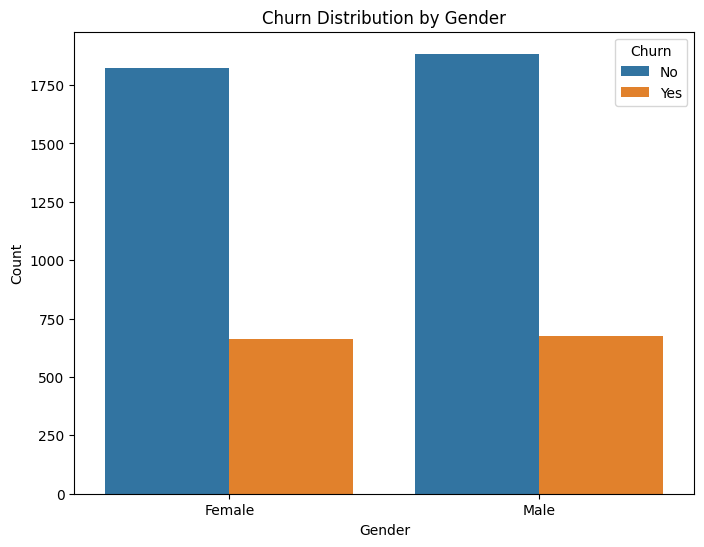

Churn Rate by Gender:
Churn         No       Yes
gender                    
Female  0.733897  0.266103
Male    0.736225  0.263775


In [369]:
# Visualizing the relationship between gender and churn
plt.figure(figsize=(8, 6))
sns.countplot(data=valid_data, x='gender', hue='Churn')
plt.title('Churn Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()
 
# Calculating churn rate by gender
churn_rate_gender = valid_data.groupby('gender')['Churn'].value_counts(normalize=True).unstack()
print("Churn Rate by Gender:")
print(churn_rate_gender)

**Insights**

In the chart, it appears that there are more females who churned than males. There is 26.6% of females who churned compared to 26.4% of males. There are also more females who did not churn than males, 73.4% of females compared to 73.6% of males.

Overall, it appears that gender may not be a significant factor in churn rate since the percentage of churned customers is nearly equal between genders.

 <h1 style="text-decoration: underline;">3. Multivariate Analysis</h1>

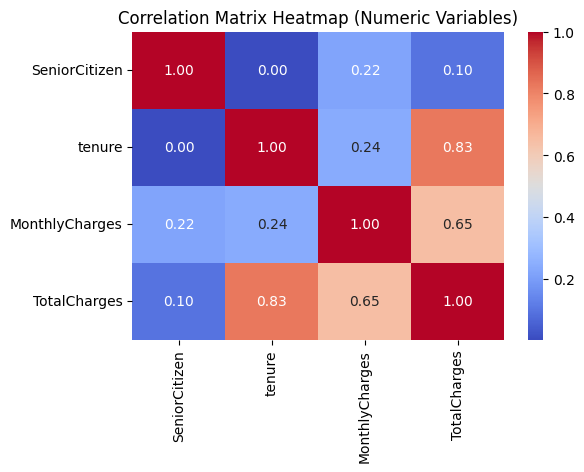

In [370]:
# Separate numeric and categorical columns
numeric_columns = valid_data.select_dtypes(include=['number']).columns
categorical_columns = valid_data.select_dtypes(include=['object', 'category']).columns

# Correlation Matrix and Heatmap for Numeric Variables
numeric_df = valid_data[numeric_columns]
numeric_correlation_matrix = numeric_df.corr()
plt.figure(figsize=(6, 4))
sns.heatmap(numeric_correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap (Numeric Variables)')
plt.show()

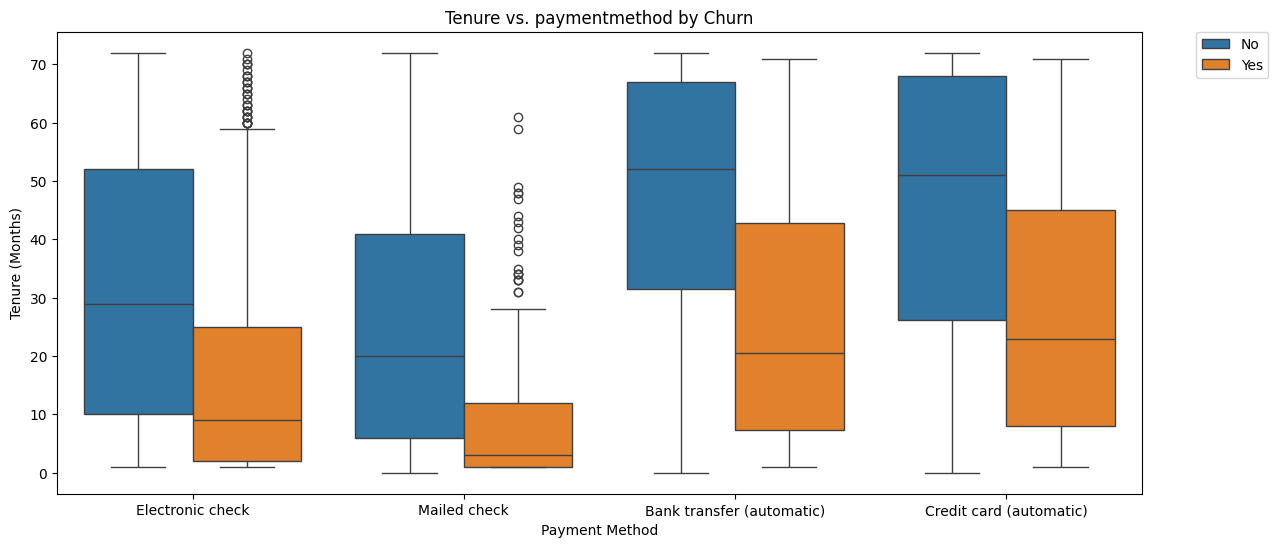

In [371]:
# Box plot of Tenure vs. MonthlyCharges vs churn
plt.figure(figsize=(14, 6))
sns.boxplot(data=valid_data, x='PaymentMethod', y='tenure', hue='Churn')
plt.title('Tenure vs. paymentmethod by Churn')
plt.xlabel('Payment Method')
plt.ylabel('Tenure (Months)')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

#### <center><h1 style="text-decoration: underline;">**BUSINESS QUESTIONS**</h1></center>



#### Q1. What is the average tenure of customers who churned compared to those who stayed?

In [372]:
# Separate customers who churned from those who stayed
churned_customers = valid_data[valid_data['Churn'] == 'Yes']
stayed_customers = valid_data[valid_data['Churn'] == 'No']

# Calculate the average tenure for each group
avg_tenure_churned = churned_customers['tenure'].mean()
avg_tenure_stayed = stayed_customers['tenure'].mean()

# Compare the average tenure of the two groups
print("Average tenure of churned customers:", avg_tenure_churned)
print("Average tenure of stayed customers:", avg_tenure_stayed)

Average tenure of churned customers: 18.24176646706587
Average tenure of stayed customers: 37.74291880226598


**Insights**

The average tenure of churned customers is 18.24 months, while the average tenure of stayed customers is 37.74 months.

This indicates that customers with a shorter tenure are more likely to churn compared to customers with a longer tenure.

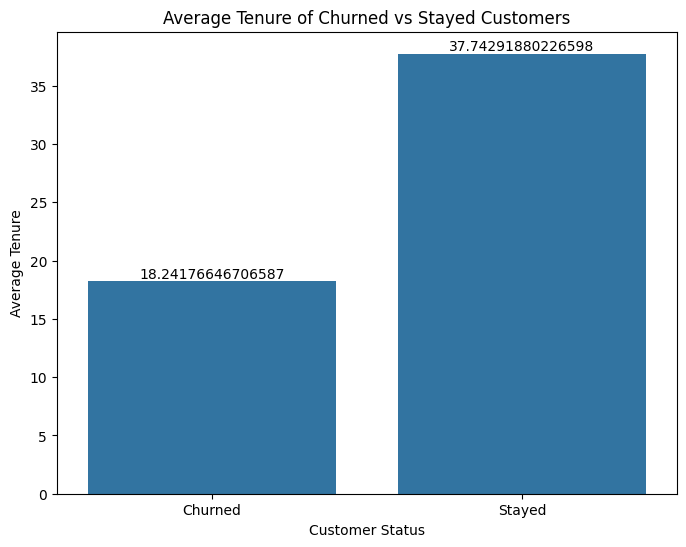

In [373]:
# Visualizing the comparison
plt.figure(figsize=(8, 6))
sns.barplot(x=['Churned', 'Stayed'], y=[avg_tenure_churned, avg_tenure_stayed])
plt.title('Average Tenure of Churned vs Stayed Customers')
plt.xlabel('Customer Status')
plt.ylabel('Average Tenure')

# Adding data labels
for index, value in enumerate([avg_tenure_churned, avg_tenure_stayed]):
    plt.text(index, value, str(value), ha='center', va='bottom')
plt.show()

#### Q2. Do customers with partners or dependents have a lower churn rate?

In [374]:
# Calculate churn rate for customers with partners
partner_churn_rate = valid_data[valid_data['Partner'] == 'Yes']['Churn'].value_counts(normalize=True)['Yes']

# Calculate churn rate for customers without partners
no_partner_churn_rate = valid_data[valid_data['Partner'] == 'No']['Churn'].value_counts(normalize=True)['Yes']

# Calculate churn rate for customers with dependents
dependent_churn_rate = valid_data[valid_data['Dependents'] == 'Yes']['Churn'].value_counts(normalize=True)['Yes']

# Calculate churn rate for customers without dependents
no_dependent_churn_rate = valid_data[valid_data['Dependents'] == 'No']['Churn'].value_counts(normalize=True)['Yes']


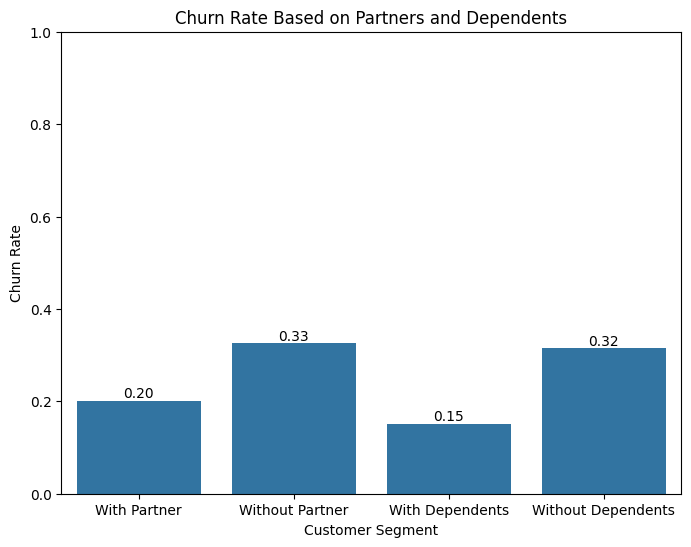

In [375]:
# Visualize the comparison
plt.figure(figsize=(8, 6))
sns.barplot(x=['With Partner', 'Without Partner', 'With Dependents', 'Without Dependents'], 
            y=[partner_churn_rate, no_partner_churn_rate, dependent_churn_rate, no_dependent_churn_rate])
plt.title('Churn Rate Based on Partners and Dependents')
plt.xlabel('Customer Segment')
plt.ylabel('Churn Rate')
plt.ylim(0, 1)  
# Set y-axis limits from 0 to 1

# Adding data labels
for index, value in enumerate([partner_churn_rate, no_partner_churn_rate, dependent_churn_rate, no_dependent_churn_rate]):
    plt.text(index, value, f'{value:.2f}', ha='center', va='bottom')
plt.show()

**Insights**

The chart indicates that customers with a partner and dependents have the lowest churn rate at 15%. Customers without a partner but with dependents have a slightly higher churn rate at 20%. Customers with a partner but without dependents have a churn rate of 32%. The highest churn rate is for customers who have neither a partner nor dependents, at 33%.

 In this case, customers with dependents likely have a greater need for the service and may be more likely to stay with the company to avoid disruption.  Customers with partners may also be more likely to stay on because they are on a shared plan.

#### Question 3: How does the presence of multiple lines affect customer churn?


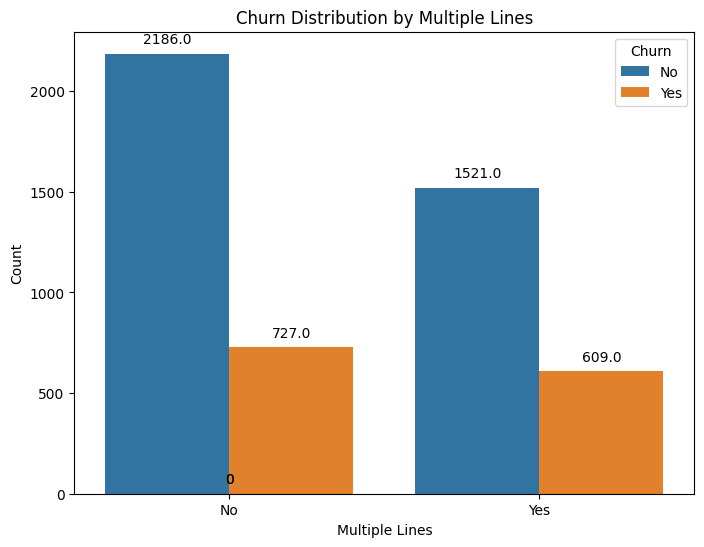

Churn Rate by Presence of Multiple Lines:
Churn                No       Yes
MultipleLines                    
No             0.750429  0.249571
Yes            0.714085  0.285915

Chi-square Test Results for Multiple Lines and Churn:
Chi-square value: 8.160054933336287
p-value: 0.004282307420627073


In [376]:
# Plotting the relationship between multiple lines and churn
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=valid_data, x='MultipleLines', hue='Churn')

# Adding data labels to each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom', xytext=(0, 5), textcoords='offset points')

plt.title('Churn Distribution by Multiple Lines')
plt.xlabel('Multiple Lines')
plt.ylabel('Count')
plt.legend(title='Churn', loc='upper right')
plt.show()

# Calculating churn rate by presence of multiple lines
churn_rate_multiple_lines = valid_data.groupby('MultipleLines')['Churn'].value_counts(normalize=True).unstack()
print("Churn Rate by Presence of Multiple Lines:")
print(churn_rate_multiple_lines)

# Chi-square test for association between multiple lines and churn
chi2, p_val, _, _ = chi2_contingency(pd.crosstab(valid_data['MultipleLines'], valid_data['Churn']))
print("\nChi-square Test Results for Multiple Lines and Churn:")
print("Chi-square value:", chi2)
print("p-value:", p_val)


**Insights**

- Customers with multiple lines tend to have a slightly higher churn rate compared to those without multiple lines.

- The chi-square test results suggest that the presence of multiple lines is significantly associated with churn.

This indicates that the presence of multiple lines may influence customer churn behavior, and it could be an important factor to consider in churn prediction and retention strategies.
Overall, these insights suggest that the presence of multiple lines could be a relevant factor in understanding and predicting customer churn.

#### Question 4: Is there a correlation between the contract term (Contract) and customer churn?

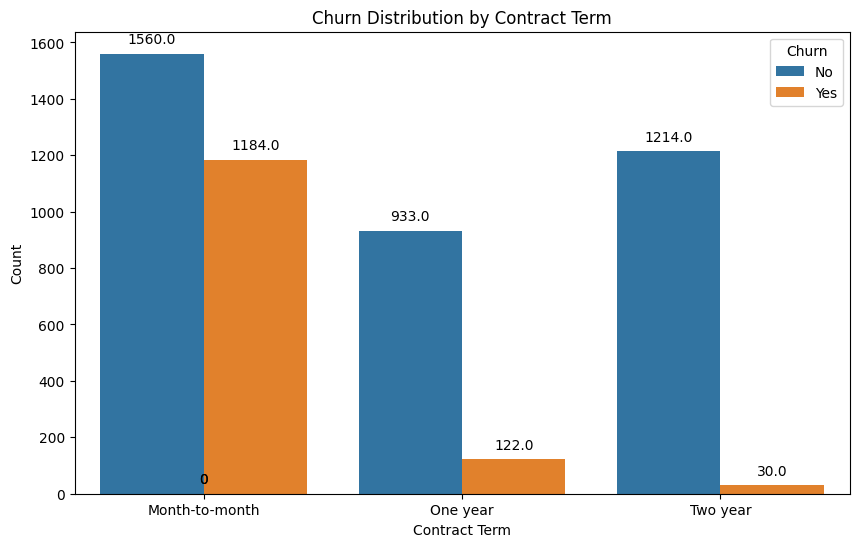


Churn Rate by Contract Term:
Churn                 No       Yes
Contract                          
Month-to-month  0.568513  0.431487
One year        0.884360  0.115640
Two year        0.975884  0.024116

Chi-square Test Results for Contract Term and Churn:
Chi-square value: 882.0901975577578
p-value: 2.86119415951209e-192


In [377]:
# Plotting the relationship between contract term and churn
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=valid_data, x='Contract', hue='Churn')

# Adding data labels to each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom', xytext=(0, 5), textcoords='offset points')

plt.title('Churn Distribution by Contract Term')
plt.xlabel('Contract Term')
plt.ylabel('Count')
plt.legend(title='Churn', loc='upper right')
plt.show()

# Calculating churn rate by contract term
churn_rate_contract = valid_data.groupby('Contract')['Churn'].value_counts(normalize=True).unstack()
print("\nChurn Rate by Contract Term:")
print(churn_rate_contract)

# Chi-square test for association between contract term and churn
chi2, p_val, _, _ = chi2_contingency(pd.crosstab(valid_data['Contract'],valid_data['Churn']))
print("\nChi-square Test Results for Contract Term and Churn:")
print("Chi-square value:", chi2)
print("p-value:", p_val)

**Insights**

- Customers with longer contract terms (one year and two years) have significantly lower churn rates compared to those with month-to-month contracts.

- The chi-square test results confirm that there is a strong association between contract term and churn.
This suggests that the contract term is a critical factor influencing customer churn behavior, with longer-term contracts leading to lower churn rates.

Overall, these insights indicate that contract term is a significant predictor of customer churn, and it should be a key consideration in churn prediction models and retention strategies. Offering longer-term contracts may help reduce churn and improve customer retention rates.

#### QN.5 What are the common payment methods (Payment Method) among customers who churned?


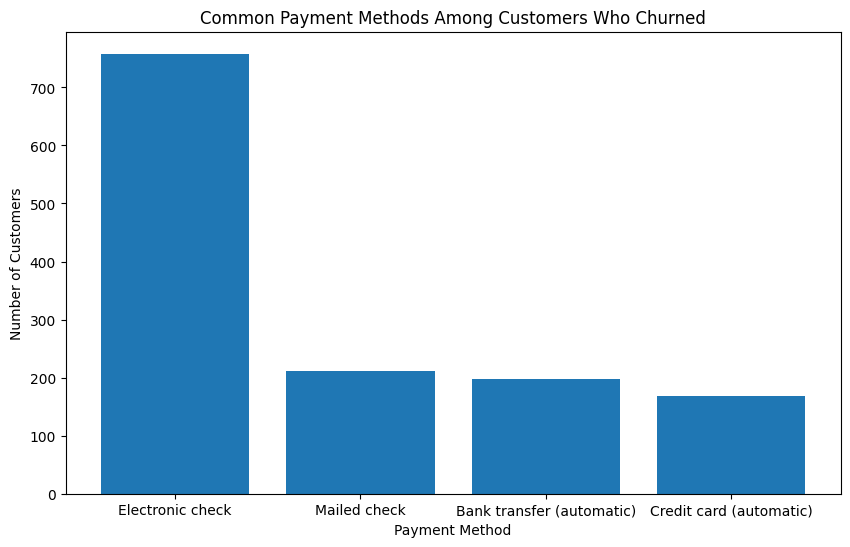

In [378]:
churned_customers = valid_data[valid_data['Churn'] == 'Yes']
common_payment_methods = churned_customers['PaymentMethod'].value_counts()

plt.figure(figsize=(10,6))
plt.bar(common_payment_methods.index, common_payment_methods.values)
plt.title('Common Payment Methods Among Customers Who Churned')
plt.xlabel('Payment Method')
plt.ylabel('Number of Customers')
plt.show()

**Insights**

Based on the chart, the most common payment methods used by customers who churned are electronic checks, bank transfers, credit cards, and cash. It appears that electronic checks are the most popular payment method used by churned customers, followed by bank transfers.

#### QN.6 How does the availability of tech-related services (e.g., OnlineSecurity, TechSupport) impact churn rates?

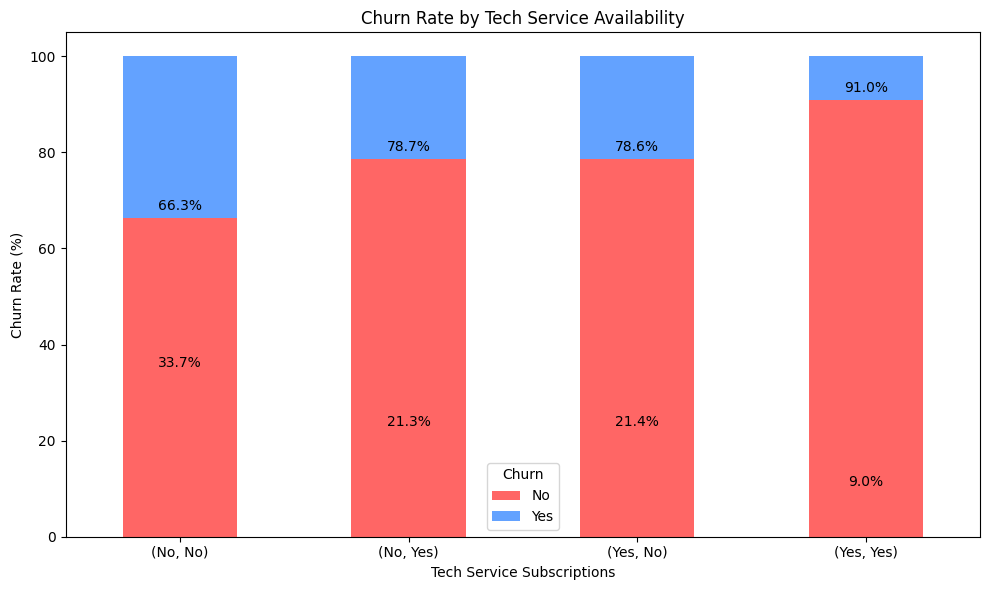

In [379]:
# Group data by subscription to tech services and churn
tech_service_groups = valid_data.groupby(['OnlineSecurity', 'TechSupport', 'Churn'])['gender'].count().unstack(fill_value=0)

# Calculate churn rate for each group
churn_rate = tech_service_groups.div(tech_service_groups.sum(axis=1), axis=0) * 100

# Create a stacked bar chart
fig, ax = plt.subplots(figsize=(10, 6))  # Create a figure and axis for better control
churn_rate.plot(kind='bar', stacked=True, color=['#FF6665', '#63A2FF'], ax=ax)
plt.xlabel('Tech Service Subscriptions')
plt.ylabel('Churn Rate (%)')
plt.title('Churn Rate by Tech Service Availability')
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability

# Add percentage labels to bars
for container in ax.containers:
    rects = container.get_children()
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width() / 2, height + 1, f"{height:.1f}%", ha='center', va='bottom')

plt.legend(title='Churn')
plt.tight_layout()  # Adjust spacing to accommodate labels
plt.show()

**Insights**

- Both Online Security and Tech Support: 9.0% churn rate
- One of Online Security or Tech Support: 21.4% churn rate (This rate is the same for customers who only have online security and those who only have tech support)
- Neither Online Security nor Tech Support: 33.7% churn rate

The churn rate increases significantly for customers who have access to none of the tech-related services. This suggests that these services are important factors in customer retention.

#### QN 7. What percentage of customers who churned had streaming services (StreamingTV, StreamingMovies)?
 

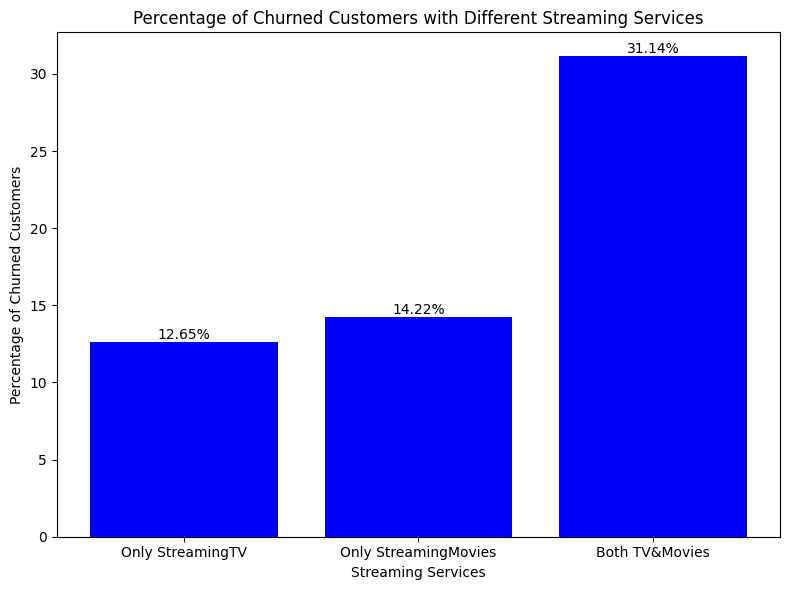

In [380]:

# Filter the DataFrame to include only churned customers
churned_customers = valid_data[valid_data['Churn'] == 'Yes']
 
# Calculate the number of churned customers with different streaming services
streaming_tv_churned_count = len(churned_customers[(churned_customers['StreamingTV'] == 'Yes') & (churned_customers['StreamingMovies'] == 'No')])
streaming_movies_churned_count = len(churned_customers[(churned_customers['StreamingTV'] == 'No') & (churned_customers['StreamingMovies'] == 'Yes')])
both_streaming_churned_count = len(churned_customers[(churned_customers['StreamingTV'] == 'Yes') & (churned_customers['StreamingMovies'] == 'Yes')])
 
# Calculate the total number of churned customers
total_churned_customers = len(churned_customers)
 
# Calculate the percentage of churned customers for each category
percentage_streaming_tv_churned = (streaming_tv_churned_count / total_churned_customers) * 100
percentage_streaming_movies_churned = (streaming_movies_churned_count / total_churned_customers) * 100
percentage_both_streaming_churned = (both_streaming_churned_count / total_churned_customers) * 100
 
# Plotting the grouped bar plot
categories = ['Only StreamingTV', 'Only StreamingMovies', 'Both TV&Movies']
percentages = [percentage_streaming_tv_churned, percentage_streaming_movies_churned, percentage_both_streaming_churned]
 
plt.figure(figsize=(8, 6))
bars = plt.bar(categories, percentages, color=['blue'])
 
# Add data labels on top of the bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}%', ha='center', va='bottom')
 
plt.xlabel('Streaming Services')
plt.ylabel('Percentage of Churned Customers')
plt.title('Percentage of Churned Customers with Different Streaming Services')
plt.xticks(rotation=360)
plt.tight_layout()
plt.show()

**Insights**

According to our analysis, the highest percentage of churned customers came from those who only subscribed to streaming TV services (31.14%).  In comparison, there is a significantly lower percentage of churn for customers who subscribed to both TV and movie streaming services (12.65%).

#### QN 8.Is there a difference in churn rates between senior citizens and non-senior citizens?

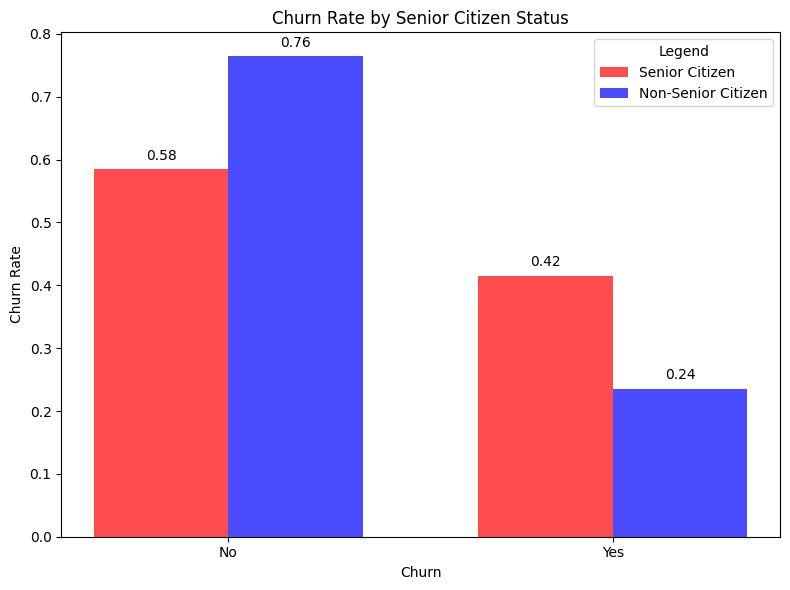

In [381]:
# Calculate churn rates for senior and non-senior citizens
senior_churn_rate = valid_data[valid_data['SeniorCitizen'] == 1]['Churn'].value_counts(normalize=True)
non_senior_churn_rate = valid_data[valid_data['SeniorCitizen'] == 0]['Churn'].value_counts(normalize=True)

# Plotting the grouped bar plot
plt.figure(figsize=(8, 6))
bar_width = 0.35
index = range(len(senior_churn_rate))

bars1 = plt.bar(index, senior_churn_rate, bar_width, color='red', label='Senior Citizen', alpha=0.7)
bars2 = plt.bar([i + bar_width for i in index], non_senior_churn_rate, bar_width, color='blue', label='Non-Senior Citizen', alpha=0.7)

# Adding data labels to each bar
def add_labels(bars):
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, f'{yval:.2f}', ha='center', va='bottom')

add_labels(bars1)
add_labels(bars2)

plt.xlabel('Churn')
plt.ylabel('Churn Rate')
plt.title('Churn Rate by Senior Citizen Status')
plt.xticks([i + bar_width / 2 for i in index], senior_churn_rate.index)
plt.legend(title='Legend')
plt.tight_layout()
plt.show()



**Insights**

Yes, according to the graph, there is a difference in churn rates between senior citizens and non-senior citizens. The churn rate for senior citizens is higher than the churn rate for non-senior citizens.

The churn rate for senior citizens is 42%.
The churn rate for non-senior citizens is 24%.

## Hypothesis Testing


### Hypothesis1
***Null Hypothesis(Ho)***: Customers with longer tenure (number of months stayed with the company) are more likely to churn compared to new customers.

***Alternative Hypothesis(Ha)***:  Customers with longer tenure (number of months stayed with the company) are less likely to churn compared to new customers.

<Figure size 1050x600 with 0 Axes>

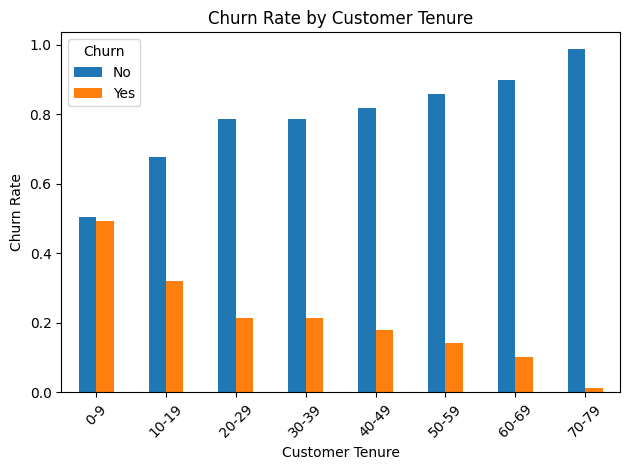

In [382]:
# Group the data by customer tenure range and calculate the churn rate
bins = [0] + [10 * i for i in range(1, 9)] # Define bins for grouping
labels = [f"{i}-{i+9}" for i in range(0, 80, 10)]  # Define labels for the bins
valid_data['Tenure_Group'] = pd.cut(valid_data['tenure'], bins=bins, labels=labels, include_lowest=True)
grouped_data = valid_data.groupby('Tenure_Group')['Churn'].value_counts(normalize=True).unstack()
 
# Plotting the bar plot
plt.figure(figsize=(10.5, 6))
grouped_data.plot(kind='bar')
plt.xlabel('Customer Tenure')
plt.ylabel('Churn Rate')
plt.title('Churn Rate by Customer Tenure')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='Churn')
plt.tight_layout()  # Adjust layout for better visualization
plt.show()
 

In [383]:
# Encode 'churn' column into numeric values
valid_data['churn_numeric'] = valid_data['Churn'].replace({'Yes': 1, 'No': 0})

# Calculate the median value for tenure
median_tenure = valid_data['tenure'].median()

# Divide the data into two categories
long_tenure = valid_data[valid_data['tenure'] >= median_tenure]['churn_numeric']
short_tenure = valid_data[valid_data['tenure'] < median_tenure]['churn_numeric']

# Perform Fisher's exact test
odds_ratio, p_value = fisher_exact([[long_tenure.sum(), short_tenure.sum()],
                                    [len(long_tenure), len(short_tenure)]])

# Print the test statistic (odds ratio) and p-value
print("Odds ratio:", odds_ratio)
print("P-value:", p_value)

# State the significance level
alpha = 0.05

# Compare p-value to the significance level
if p_value < alpha:
    print("Reject Null Hypothesis: There is a significant difference in churn rates between customers with shorter and longer tenure.")
else:
    print("Fail to Reject Null Hypothesis: There is no significant difference in churn rates between customers with shorter and longer tenure.")



Odds ratio: 0.33632517216350666
P-value: 2.8376888726914e-62
Reject Null Hypothesis: There is a significant difference in churn rates between customers with shorter and longer tenure.


### Hypothesis2
***Null Hypothesis(Ho)***: Customers with higher monthly charges (MonthlyCharges) are more likely to churn due to cost considerations.

***Alternative Hypothesis(Ha)***: Customers with higher monthly charges (MonthlyCharges) are less likely to churn due to cost considerations.

In [384]:
# Encode 'churn' column into numeric values
valid_data['churn_numeric'] = valid_data['Churn'].replace({'Yes': 1, 'No': 0})

# Calculate the median value for monthlycharge
median_monthlycharge = valid_data['MonthlyCharges'].median()

# Divide the data into two categories
high_monthlycharge = valid_data[valid_data['MonthlyCharges'] >= median_monthlycharge]['churn_numeric']
low_monthlycharge = valid_data[valid_data['MonthlyCharges'] < median_monthlycharge]['churn_numeric']

# Perform Mann-Whitney U test
statistic, p_value = mannwhitneyu(high_monthlycharge, low_monthlycharge)

# Print the test statistic (U statistic) and p-value
print("Mann-Whitney U statistic:", statistic)
print("P-value:", p_value)

# State the significance level
alpha = 0.05

# Compare p-value to the significance level
if p_value < alpha:
    print("Reject Null Hypothesis: There is a significant difference in churn rates between customers with higher and lower monthly charge.")
else:
    print("Fail to Reject Null Hypothesis: There is no significant difference in churn rates between customers with higher and lower monthly charge.")


Mann-Whitney U statistic: 3743974.5
P-value: 2.219391973354535e-46
Reject Null Hypothesis: There is a significant difference in churn rates between customers with higher and lower monthly charge.


#### <center><h1 style="text-decoration: underline;">**FEATURE ENGINEERING**</h1></center>



## `Data Preparation`

In [385]:
train_df = pd.read_csv('Data/train.csv')

In [386]:
train_df.head(2)

,Unnamed: 0,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,0,7590-VHVEG,Female,0,Yes,No,1,No,NaN,DSL,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.850000,29.85,No
1,1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,...,Yes,No,No,No,One year,No,Mailed check,56.950001,1889.50,No


In [387]:

train_df.drop(columns=['customerid','Unnamed: 0'], axis = 1, inplace = True)

In [388]:
train_df.head(2)

,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,Female,0,Yes,No,1,No,NaN,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.850000,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.950001,1889.50,No


In [389]:
train_df.isna().sum()

gender                0
seniorcitizen         0
partner               0
dependents            0
tenure                0
phoneservice          0
multiplelines       269
internetservice       0
onlinesecurity      651
onlinebackup        651
deviceprotection    651
techsupport         651
streamingtv         651
streamingmovies     651
contract              0
paperlessbilling      0
paymentmethod         0
monthlycharges        0
totalcharges          8
churn                 1
dtype: int64

#### To prevent data leakage, drop row with missing value in the churn column

In [390]:
train_df.dropna(subset='churn', inplace=True)

Check if the target variable is balanced

In [391]:
churn_distribution = train_df['churn'].value_counts().rename('total').reset_index()
churn_distribution

,churn,total
0,No,3706
1,Yes,1336


Splitting the data into X and y variables

In [392]:
X = train_df.drop('churn', axis =1)
y = train_df[['churn']]




In [393]:
X_train, X_eval, y_train, y_eval =  train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [394]:
encoder = LabelEncoder()

y_train_encoded = encoder.fit_transform(y_train)
y_eval_encoded = encoder.transform(y_eval)


#### Preparing Pipelines

In [395]:
numerical_columns = X.select_dtypes('number').columns
categorical_columns = X.select_dtypes('object').columns

In [396]:
numerical_pipeline = Pipeline(steps=[
    ('num_imputer', SimpleImputer(strategy = 'median')),
    ('num_scaler', StandardScaler())
])

categorical_pipeline = Pipeline(steps=[
    ('cat_imputer', SimpleImputer(strategy='most_frequent')),
    ('cat-encoder', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(transformers=[
    ('num', numerical_pipeline, numerical_columns),
    ('cat', categorical_pipeline, categorical_columns)
])

## Modelling

In [397]:
models =[
    ('Decision_tree', DecisionTreeClassifier(random_state=42)),
    ('Logistic_reg', LogisticRegression(random_state=42)),
    ('knn', KNeighborsClassifier(n_neighbors=5)),
    ('random_forest', RandomForestClassifier(random_state = 42))
]

# Creating dictionary for the models
all_pipelines = {}

# Create an empty DataFrame for metrics
metrics_table = pd.DataFrame(columns=['model_name', 'accuracy', 'precision', 'recall', 'f1_score'])

# Loop over models and create pipelines, fit models, and calculate metrics
for model_name, classifier in models:
    final_pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', classifier)
    ])
    
    # Fit the pipeline on training data
    final_pipeline.fit(X_train, y_train_encoded)
    
    # Make predictions on the evaluation dataset
    y_pred = final_pipeline.predict(X_eval)
    
    # Calculate classification report metrics
    metrics = classification_report(y_eval_encoded, y_pred, output_dict=True)
    
    # Extract metrics for the current model
    accuracy = metrics['accuracy']
    precision = metrics['weighted avg']['precision']
    recall = metrics['weighted avg']['recall']
    f1_score = metrics['weighted avg']['f1-score']
    
    # Add metrics to metrics_table
    metrics_table.loc[len(metrics_table)] = [model_name, accuracy, precision, recall, f1_score]

# Display the metrics table
metrics_table.sort_values(ascending=False, by='accuracy')

,model_name,accuracy,precision,recall,f1_score
1,Logistic_reg,0.799802,0.794989,0.799802,0.796963
3,random_forest,0.786918,0.776866,0.786918,0.779906
2,knn,0.765114,0.764275,0.765114,0.764687
0,Decision_tree,0.723489,0.731998,0.723489,0.727303


**Insights**

Based on the results of the comparison of four different machine learning models, it appears that the Logistic Regression model (Logistic_reg) is the best performing model for this dataset, with an accuracy of 0.799802, precision of 0.794989, recall of 0.799802, and F1-score of 0.796963. These metrics suggest that the Logistic Regression model is able to accurately classify the majority of samples in the dataset, with a low rate of false positives and false negatives.

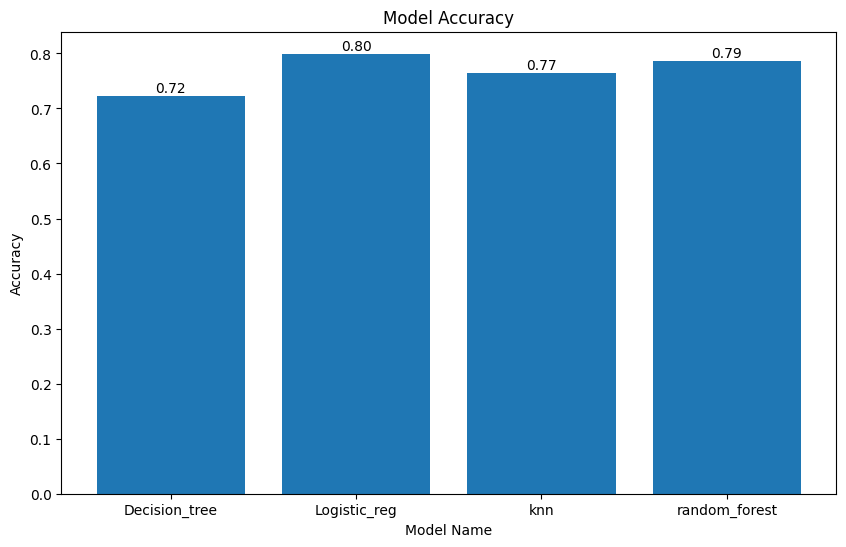

In [398]:
# Create a bar chart
plt.figure(figsize=(10,6))
bars = plt.bar(metrics_table['model_name'], metrics_table['accuracy'])

# Add text labels inside the bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, '{:.2f}'.format(height), 
             ha='center', va='bottom')

plt.xlabel('Model Name')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.xticks(rotation=0)
plt.show()


In [399]:
final_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('num_imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('num_scaler',
                                                                   StandardScaler())]),
                                                  Index(['seniorcitizen', 'tenure', 'monthlycharges', 'totalcharges'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('cat_imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('cat-encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['gender', 'partner', 'dependents', 'phoneservice', 'multiplelines',
       'internetservice', 'onlinesecurity', 'onlinebackup', 'deviceprotection',
       'techsupport', 'streamingtv', 'streamingmovies', 'contract',
       'paperlessbilling', 'paymentmethod'],
      dtype='object'))])),
                ('classifier', RandomForestClassifier(random_state=42))])

In [400]:
from sklearn.metrics import classification_report, confusion_matrix

all_confusion_matrix = {}

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_eval_encoded, y_pred)

all_confusion_matrix[model_name] = conf_matrix

In [401]:
all_confusion_matrix

{'random_forest': array([[658,  84],
        [131, 136]], dtype=int64)}

<Axes: >

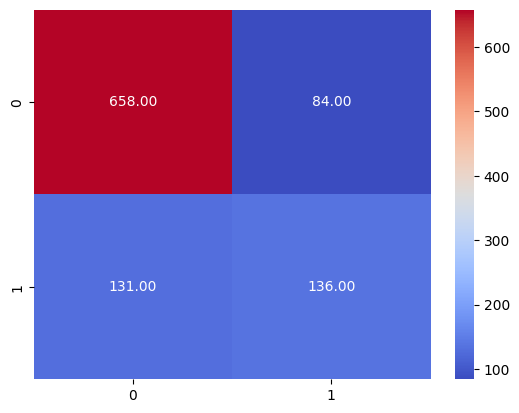

In [402]:
forest_matrix = all_confusion_matrix['random_forest']
sns.heatmap(forest_matrix, annot = True, cmap = 'coolwarm', fmt = '.2f')

#### Visualizing ROC_AUC Curve

In [410]:
ax.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc})')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


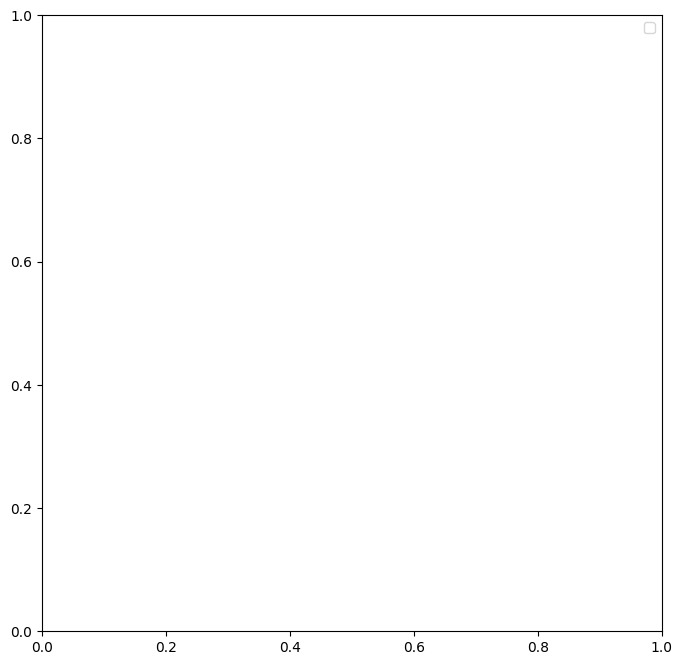

In [412]:
from sklearn.metrics import roc_curve, auc

fig, ax = plt.subplots(figsize = (8,8))

# add confusion matrix to all pipelines
all_confusion_matrix = {}

all_roc_data = {}

for model_name, pipeline in all_pipelines.items():
    y_score = pipeline.predict_proba(X_eval)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_eval_encoded, y_score)

    roc_auc = auc(fpr, tpr)

    roc_data_df = pd.DataFrame({'False Positive rate': fpr, 'True Positive Rate': tpr, 'Thresholds': thresholds})

    all_roc_data[model_name] = roc_data_df

    ax.plot(fpr, tpr, label= f'{model_name} (AUC ={roc_auc})')

    ax.plot([0,1], [0,1])
    ax.set_ylabel('False Positive Rate')
    ax.set_xlabel('True Positive Rate')
    ax.set_title(f'ROC Curve - {model_name}') 

plt.legend() 
plt.show()   




In [415]:
log_pipeline = all_pipelines['Logistic_reg']

KeyError: 'Logistic_reg'

In [ ]:
all_roc_data['Logistic_reg'].tail(50)


,False Positive rate,True Positive Rate,Thresholds
226,0.355795,0.898876,0.192607
227,0.365229,0.898876,0.185634
228,0.365229,0.902622,0.185528
229,0.371968,0.902622,0.181547
230,0.371968,0.910112,0.180801
231,0.386792,0.910112,0.176963
232,0.386792,0.913858,0.176919
233,0.389488,0.913858,0.176802
234,0.389488,0.917603,0.176773
235,0.392183,0.917603,0.173344


<Axes: >

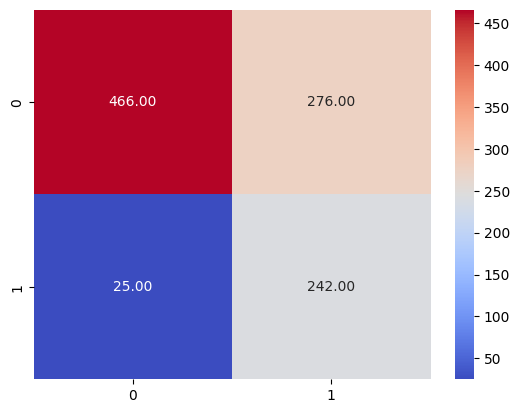

In [ ]:
threshold = 0.180801

y_pred_proba = log_pipeline.predict_proba(X_eval)[:,1]

binary_predictions = (y_pred_proba > threshold).astype(int)
threshold_matrix = confusion_matrix(y_eval_encoded, binary_predictions)

# plot heat map of threshold conf_matrix
sns.heatmap(threshold_matrix, annot = True, cmap = 'coolwarm', fmt = '.2f')

### Training Models on Balanced Datasets


In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as imbPipeline

balanced_data_models =[
    ('Decision_tree', DecisionTreeClassifier(random_state=42)),
    ('Logistic_reg', LogisticRegression(random_state=42)),
    ('knn', KNeighborsClassifier(n_neighbors=5)),
    ('random_forest', RandomForestClassifier(random_state = 42))
]

# Creating dictionary for the models
balanced_data_all_pipelines = {}

# Create an empty DataFrame for metrics
balanced_data_metrics_table = pd.DataFrame(columns=['model_name', 'accuracy', 'precision', 'recall', 'f1_score'])

# Loop over models and create pipelines, fit models, and calculate metrics
for model_name, classifier in models:
    balanced_data_final_pipeline = imbPipeline(steps=[
        ('preprocessor', preprocessor),
        ('smote_sampler', SMOTE(random_state =42)),
        ('classifier', classifier)
    ])
    
    # Fit the pipeline on training data
    balanced_data_final_pipeline.fit(X_train, y_train_encoded)
    
    # Make predictions on the evaluation dataset
    y_pred = balanced_data_final_pipeline.predict(X_eval)
    
    # Calculate classification report metrics
    balanced_data_metrics = classification_report(y_eval_encoded, y_pred, output_dict=True)

    # Add all pipelines into balanced_data_all_pipelines
    balanced_data_all_pipelines[model_name] = balanced_data_final_pipeline
    
    # Extract metrics for the current model
    accuracy = metrics['accuracy']
    precision = metrics['weighted avg']['precision']
    recall = metrics['weighted avg']['recall']
    f1_score = metrics['weighted avg']['f1-score']
    
    # Add metrics to metrics_table
    balanced_data_metrics_table.loc[len(balanced_data_metrics_table)] = [model_name, accuracy, precision, recall, f1_score]

# Display the metrics table
balanced_data_metrics_table.sort_values(ascending=False, by='f1_score')

,model_name,accuracy,precision,recall,f1_score
0,Decision_tree,0.786918,0.776866,0.786918,0.779906
1,Logistic_reg,0.786918,0.776866,0.786918,0.779906
2,knn,0.786918,0.776866,0.786918,0.779906
3,random_forest,0.786918,0.776866,0.786918,0.779906


The models performed better on the imbalanced dataset so we will use the imbalanced dataset for evaluation and hyperparameter tuning

### HyperTuning

In [ ]:
# Define the hyperparameters to search

param_grids = {

    'Decision_tree': {
        'classifier__max_depth': [None, 10, 20, 30],
        'classifier__min_samples_split': [2, 5, 10]
    },

    'Logistic_reg': {
        'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100],        
        'classifier__solver' : ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],
        'classifier__max_iter': [300]
    },

    'knn': {
        'classifier__n_neighbors': [3, 5, 7, 9, 11]
    },

    'random_forest': {
        'classifier__n_estimators': [10, 50, 100, 200],
        'classifier__max_depth': [None, 10, 20, 30]
    } 

    }


params = {}
search_histories = {}

for model_name, classifier in models:
    final_pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', classifier)
    ])

    param_grid = param_grids[model_name]
    grid_search = GridSearchCV(
        estimator = final_pipeline, 
        param_grid = param_grid, 
        cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42), 
        scoring = ['f1_weighted', 'precision', 'recall'],
        refit = 'f1_weighted',
        verbose = 3, 
        n_jobs = -1
    )
    grid_search.fit(X_train, y_train_encoded)
    params[model_name] = grid_search
        
    search_history = pd.DataFrame(grid_search.cv_results_)        
    search_histories[model_name] = search_history

for model_name, grid_search in params.items():
    print(f'Best hyperparamters for {model_name}:{grid_search.best_params_}')

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Fitting 5 folds for each of 36 candidates, totalling 180 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best hyperparamters for Decision_tree:{'classifier__max_depth': 10, 'classifier__min_samples_split': 10}
Best hyperparamters for Logistic_reg:{'classifier__C': 0.1, 'classifier__max_iter': 300, 'classifier__solver': 'newton-cg'}
Best hyperparamters for knn:{'classifier__n_neighbors': 11}
Best hyperparamters for random_forest:{'classifier__max_depth': 10, 'classifier__n_estimators': 200}


In [ ]:
# Get the models with the best hyperparameters
def get_best_models(params):
    best_models = []
    for model_name, grid_search in params.items():
        best_model = grid_search.best_estimator_
        best_models.append((model_name, best_model))    
    
    return best_models
 
best_models = get_best_models(params)

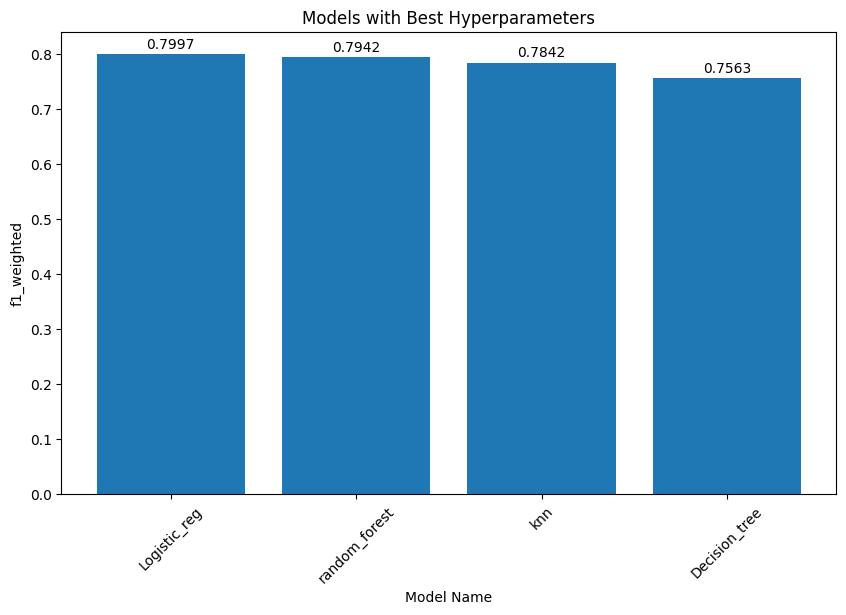

In [ ]:
# Get models f1_weighted scores and names
model_names = [model_name for model_name in search_histories.keys()]
model_scores = [search_history['mean_test_f1_weighted'].max() for search_history in search_histories.values()]

# Create a DataFrame to for plot
df_models = pd.DataFrame({'model_name': model_names, 'f1_score': model_scores})
df_models = df_models.sort_values(by='f1_score', ascending=False)


# Create a bar chart
plt.figure(figsize=(10,6))
plt.bar(data=df_models, x='model_name', height='f1_score')

# Add text labels to the bars
for i, score in enumerate(df_models['f1_score']):
    plt.text(i, score+0.01, '{:1.4f}'.format(score), ha="center")

plt.xlabel('Model Name')
plt.ylabel('f1_weighted')
plt.title('Models with Best Hyperparameters')
plt.xticks(rotation=45)
plt.show()

In [ ]:
metric_before_after_tuning_models = pd.merge(
    metrics_table[['model_name', 'f1_score']], 
    df_models, 
    on='model_name', 
    how='inner', 
    suffixes=('_before', '_after')
).sort_values(ascending=False, by='f1_score_after')

metric_before_after_tuning_models

,model_name,f1_score_before,f1_score_after
1,Logistic_reg,0.796963,0.799653
3,random_forest,0.779906,0.794231
2,knn,0.764687,0.784230
0,Decision_tree,0.727303,0.756317


#### Compare models before and after hyperparameter tuning using f1 score (weighted) metric

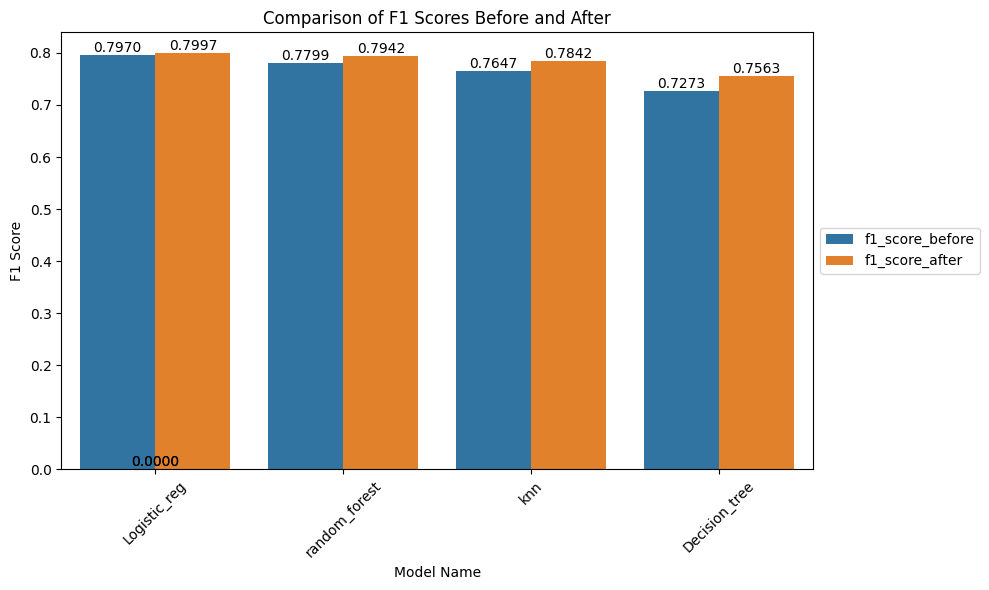

In [ ]:
# Melt the DataFrame to combine f1_score_before and f1_score_after into a single column
metric_melted = metric_before_after_tuning_models.melt(id_vars='model_name', var_name='score_type', value_name='f1_score')

# Set the figure size
plt.figure(figsize=(10, 6))

# Plot the combined data
ax = sns.barplot(data=metric_melted, x='model_name', y='f1_score', hue='score_type')
plt.title('Comparison of F1 Scores Before and After')
plt.xlabel('Model Name')
plt.ylabel('F1 Score')
plt.xticks(rotation=45)

# Annotate the values on top of the bars
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.4f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 5), 
                textcoords = 'offset points')
    
# Move legend to the right side
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.tight_layout()
plt.show()

In [ ]:
best_model_name = df_models['model_name'].iloc[0]
best_model = dict(best_models).get(best_model_name)
best_model

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('num_imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('num_scaler',
                                                                   StandardScaler())]),
                                                  Index(['seniorcitizen', 'tenure', 'monthlycharges', 'totalcharges'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('cat_imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('cat-encoder',
                                                                   OneH...re'))]),
                                                  Index(['gender', 'partner', 'dependents', 'phoneservice', 'multiplelines',
       'internetservice', 'onlinesecurity', 'onlinebackup', 'deviceprotection',
       'techsupport', 'streamingtv', 'streamingmovies', 'contract',
       'paperlessbilling', 'paymentmethod'],
      dtype='object'))])),
                ('classifier',
                 LogisticRegression(C=0.1, max_iter=300, random_state=42,
                                    solver='newton-cg'))])

In [ ]:
# Get the feature names after transformation
feature_columns = best_model.named_steps['preprocessor'].get_feature_names_out()

# Remove unwanted prefixes and get the last part
feature_columns = np.array([col.split('__')[-1] for col in feature_columns])

# Display the feature columns
pd.DataFrame(feature_columns).rename(columns={0:'feature_columns'})


,feature_columns
0,seniorcitizen
1,tenure
2,monthlycharges
3,totalcharges
4,gender_Female
5,gender_Male
6,partner_No
7,partner_Yes
8,dependents_No
9,dependents_Yes


In [ ]:
# Access the coefficients since best model is logistic regression
coefficients = best_model.named_steps['classifier'].coef_[0]

coefficients_df = pd.DataFrame({'Feature': feature_columns, 'Coefficient': coefficients})

# Magnitude of impact
coefficients_df['Absolute Coefficient'] = np.abs(coefficients_df['Coefficient'])
coefficients_df.sort_values(by="Absolute Coefficient", ascending=False, inplace=True)

coefficients_df

,Feature,Coefficient,Absolute Coefficient
1,tenure,-1.025702,1.025702
29,contract_Month-to-month,0.647437,0.647437
31,contract_Two year,-0.619119,0.619119
15,internetservice_Fiber optic,0.526299,0.526299
16,internetservice_No,-0.472014,0.472014
2,monthlycharges,0.424415,0.424415
11,phoneservice_Yes,-0.348299,0.348299
10,phoneservice_No,0.348148,0.348148
3,totalcharges,0.336121,0.336121
24,techsupport_Yes,-0.244635,0.244635


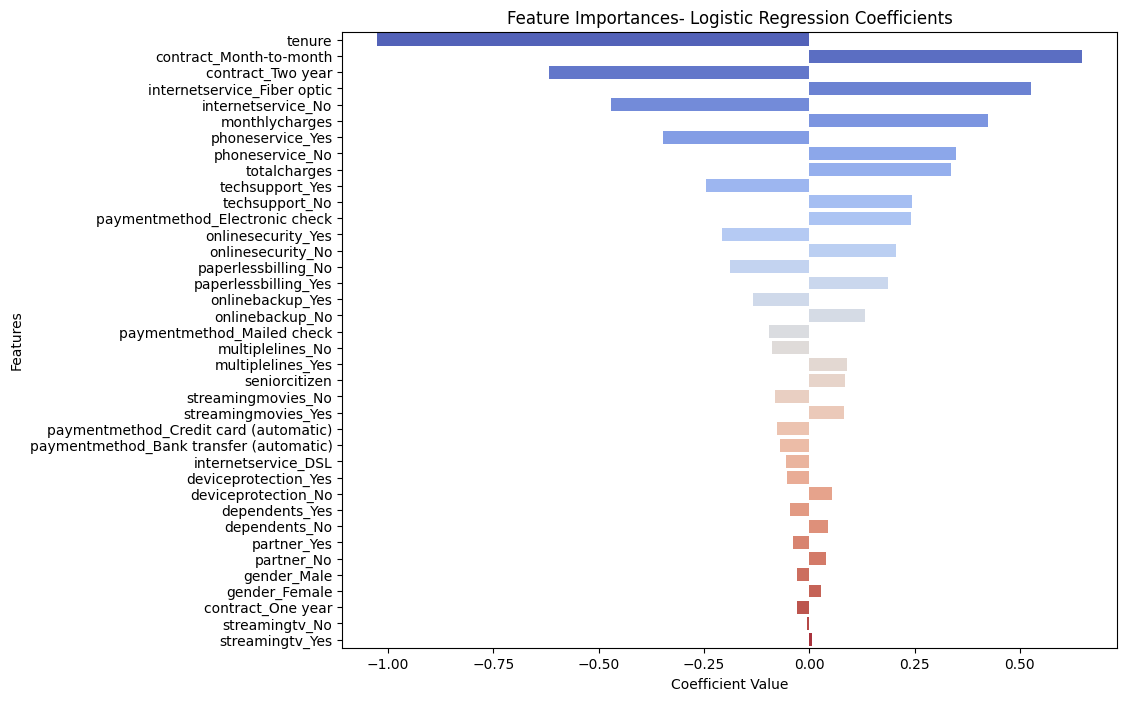

In [ ]:
# Visualizing the feature importances
plt.figure(figsize=(10, 8))
sns.barplot(x='Coefficient', y='Feature', data=coefficients_df, palette='coolwarm')
plt.title('Feature Importances- Logistic Regression Coefficients')
plt.xlabel('Coefficient Value')
plt.ylabel('Features')
plt.show()

## Understanding Feature Importances in Customer Behavior Prediction

### Overview
We utilized the best model- logistic regression to identify the most influential factors predicting customer behavior in our dataset. The coefficients from the model, presented as "feature importances," indicate how each variable impacts the likelihood of customer actions (e.g., churn or not churn).

### Key Findings

**1. Tenure**: 
- **Impact**: Most significant negative impact on the outcome (-1.026).
- **Interpretation**: Longer tenure reduces the likelihood of the predicted outcome, suggesting that longer-term customers are more stable.

**2. Contract Type**:
- **Month-to-month contracts**: Increases the likelihood of the outcome by 0.647, indicating higher volatility or turnover in short-term customers.
- **Two-year contracts**: Significant negative coefficient (-0.619), correlating with higher customer retention and stability.

**3. Internet Service**:
- **Fiber optic services**: More likely to exhibit the outcome (+0.526), potentially indicating higher expectations or different service experiences.
- **No internet service**: Negative coefficient (-0.472), reduces the likelihood, possibly due to reduced engagement with services.

**4. Billing and Payment Methods**:
- **Electronic checks**: Positive coefficient (+0.242), suggesting this payment method might be associated with more transient or less satisfied customer segments.
- **Automatic payments and mailed checks**: Show lesser significance but indicate different customer behavior patterns.

**5. Add-on Services**:
- Features like **online security**, **tech support**, and **streaming services** have varying impacts. The presence of these services generally increases or decreases the likelihood of the outcome, highlighting their influence on customer satisfaction and retention.

### Implications and Recommendations

- **Customer Retention**: Strengthen retention strategies by enhancing service offerings for long-tenure customers, particularly those in stable contract setups like two-year agreements.
- **Service Improvement**: Investigate the high impact of fiber optic services on customer behavior, focusing on improving service quality or customer support for these users.
- **Payment Flexibility**: Consider promoting automatic payment methods which appear to associate with more stable customer behavior, potentially improving overall customer satisfaction and retention.
- **Targeted Marketing**: Adjust marketing strategies to address the specific needs of different customer segments, particularly focusing on those with month-to-month contracts or using electronic checks.

#### Evaluate the best model on the evaluation set

In [ ]:
y_eval_pred = best_model.predict(X_eval)
print(f'Classification report of the best model- {best_model_name}\n\n{classification_report(y_true=y_eval_encoded, y_pred=y_eval_pred)}')

Classification report of the best model- Logistic_reg

              precision    recall  f1-score   support

           0       0.85      0.88      0.87       742
           1       0.64      0.57      0.60       267

    accuracy                           0.80      1009
   macro avg       0.74      0.73      0.73      1009
weighted avg       0.79      0.80      0.80      1009



### Prepare Test dataset

In [ ]:
test_df = pd.read_excel('Data/Telco-churn-last-2000.xlsx')

In [ ]:
test_df.drop('customerID', axis=1, inplace =True)

In [ ]:
test_df.columns = test_df.columns.str.lower()


In [ ]:
# test_df['totalcharges'] = test_df['totalcharges'].
test_df['totalcharges'] = pd.to_numeric(test_df['totalcharges'], errors = 'coerce')

In [ ]:
train_df.head()

,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,Female,0,Yes,No,1,No,NaN,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.850000,29.850000,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.950001,1889.500000,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.849998,108.150002,Yes
3,Male,0,No,No,45,No,NaN,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.299999,1840.750000,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.699997,151.649994,Yes


Through optimization of model hyperparameters, we identified the best configuration for each model, leading to significant performance gains. Hyperparameter tuning is crucial because machine learning model effectiveness is heavily influenced by these parameters.

Our approach resulted in performance improvement across all models, with the Logistic Regression model achieving the highest F1-score (0.796963). However, it's important to remember that the optimal model selection depends on the specific problem being addressed and the consequences of false positive results.

#### Using the Test Data to test our model and predict churn of customers

In [ ]:
predicted_churn = best_model.predict(test_df)
predicted_churn

array([1, 0, 0, ..., 1, 0, 0])

In [ ]:
# Create an array of corresponding labels
labels = np.array(['No', 'Yes']) # Index 0 is No, 1 is Yes
test_df['predicted_churn'] = labels[predicted_churn]


In [ ]:
test_df.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,predicted_churn
0,Male,0,No,No,12,Yes,Yes,Fiber optic,No,No,No,No,Yes,No,Month-to-month,Yes,Electronic check,84.45,1059.55,Yes
1,Male,0,No,No,9,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.40,181.8,No


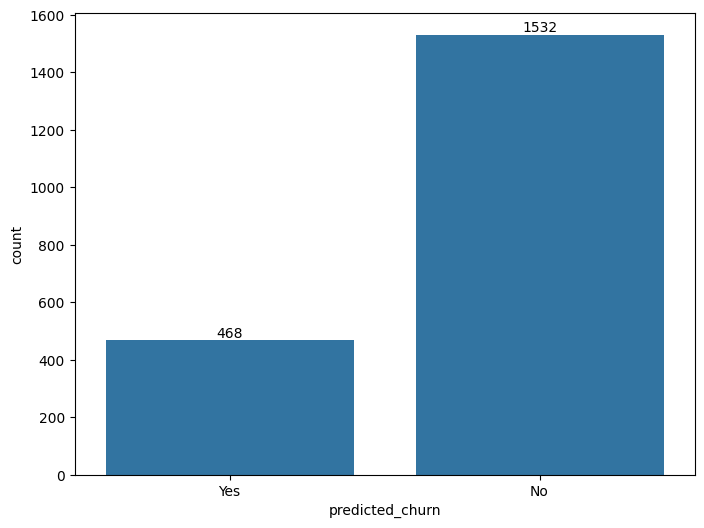

In [ ]:
# Create the figure
plt.figure(figsize=(8, 6))

ax=sns.countplot(test_df, x='predicted_churn')

# Add count values on top of each bar
for p in ax.patches:
    count = int(p.get_height())  # Convert count to integer
    ax.annotate(f'{count}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')
plt.show()

#### Persist/Saving the Model

In [ ]:
import os

# Create the directory if it does not exist
if not os.path.exists('./Trained models/'):
    os.makedirs('./Trained models/')

In [ ]:
import joblib

for model_name, pipeline in all_pipelines.items():
    joblib.dump(model_name,f'./Trained models/{model_name}.joblib')

    joblib.dump(encoder,f'./Trained models/encoder.joblib')

                                                